# Libraries and dataset import

In [2]:
# !jt -t monokai theme customized 
# !jt -t r

In [ ]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time
# import plotly.plotly as py
# import cufflinks as cf
# from ipywidgets import interact
# import plotly.tools as tls


## Cellphone dataset reading

In [ ]:
cell = pd.read_csv('20190928-items.csv')

In [ ]:
print(round(100-(577/792*100), 1))
# 27% of 'prices' are absent

In [ ]:
cell.head(3)

In [ ]:
cell.info()

## Prices 
Removing $ and float number type. USD. Keep NaN. 

In [8]:
cell['prices']=cell.prices.str.strip('$')
# cell['prices']=cell.prices.astype(float)

In [9]:
cell[(cell.prices == '142.99,$239.00')]

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
77,B00IZ1XA94,Samsung,"Samsung Galaxy S5, Black 16GB (AT&T)",https://www.amazon.com/Samsung-Galaxy-S5-Black...,https://m.media-amazon.com/images/I/81RhT3GofX...,3.7,https://www.amazon.com/product-reviews/B00IZ1XA94,4,"142.99,$239.00"


In [10]:
cell.loc['77', 'prices']= '142.99'


In [11]:
cell.iloc[77]

asin                                                   B00IZ1XA94
brand                                                     Samsung
title                        Samsung Galaxy S5, Black 16GB (AT&T)
url             https://www.amazon.com/Samsung-Galaxy-S5-Black...
image           https://m.media-amazon.com/images/I/81RhT3GofX...
rating                                                        3.7
reviewUrl       https://www.amazon.com/product-reviews/B00IZ1XA94
totalReviews                                                    4
prices                                             142.99,$239.00
Name: 77, dtype: object

In [12]:
cell.at['77', 'prices']= '142.99'

In [13]:
without_prices=cell[cell['prices'].isna()]

In [14]:
without_prices.groupby('brand')['asin'].count().sort_values(ascending=False)

brand
Samsung     133
Motorola     31
Nokia        18
Sony          8
HUAWEI        7
Google        7
Apple         7
OnePlus       2
ASUS          2
Name: asin, dtype: int64

## Reviews dataset reading

In [ ]:
reviews=pd.read_csv('20190928-reviews.csv', parse_dates=["date"])

In [ ]:
reviews.head(2)

In [ ]:
reviews.info()

## Join  dataset **cell** on asin column to the dataset **reviews** 

In [ ]:
# asin column = Amason product  unique identification number
reviews=cell.join(reviews.set_index('asin'), on='asin', rsuffix='_other').reset_index(drop=True)

In [ ]:
reviews.head(2)

In [ ]:
reviews.info()

In [ ]:
# rename the columns
df=reviews.rename(columns={"rating_other": "rating_individual", "title_other": "rating_title", "rating": "mean_rating", "body": "ratingBody", "title":"productTitle"})
df.columns

# Total reviews plot by date (YearMonthDdate)

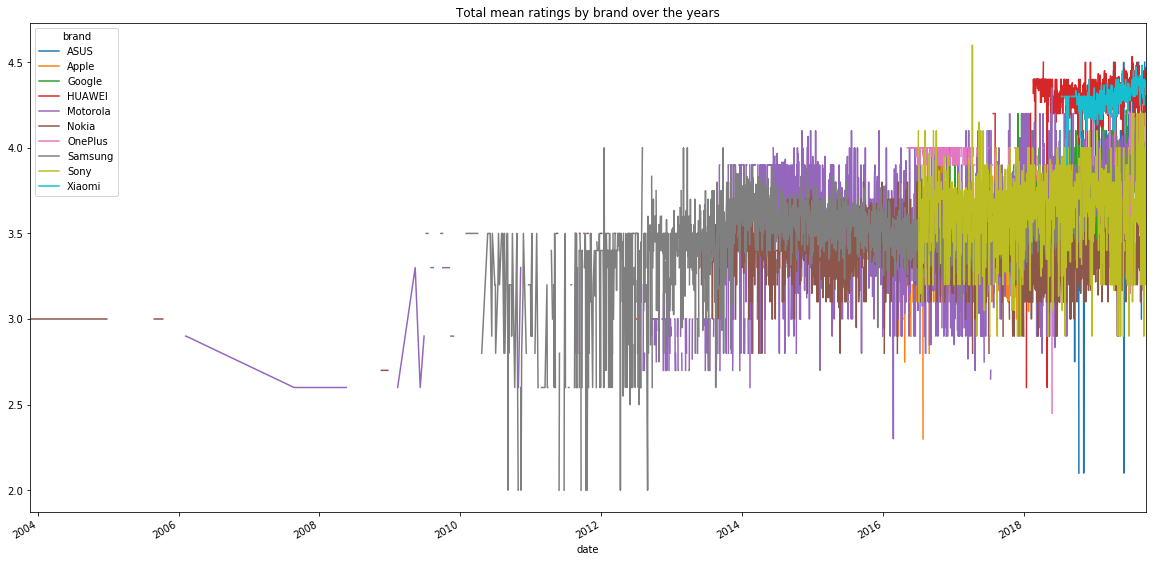

In [126]:
df.groupby(['date','brand'])['mean_rating'].mean().unstack().plot(figsize=(20,10))
plt.title('Total mean ratings by brand over the years')
plt.show()

# The birth of first android OS smartphones were in 2010. Thus the period of 2004 to 2010 contains low data

In [127]:
#get new columns year, month and day from the 'date' column
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

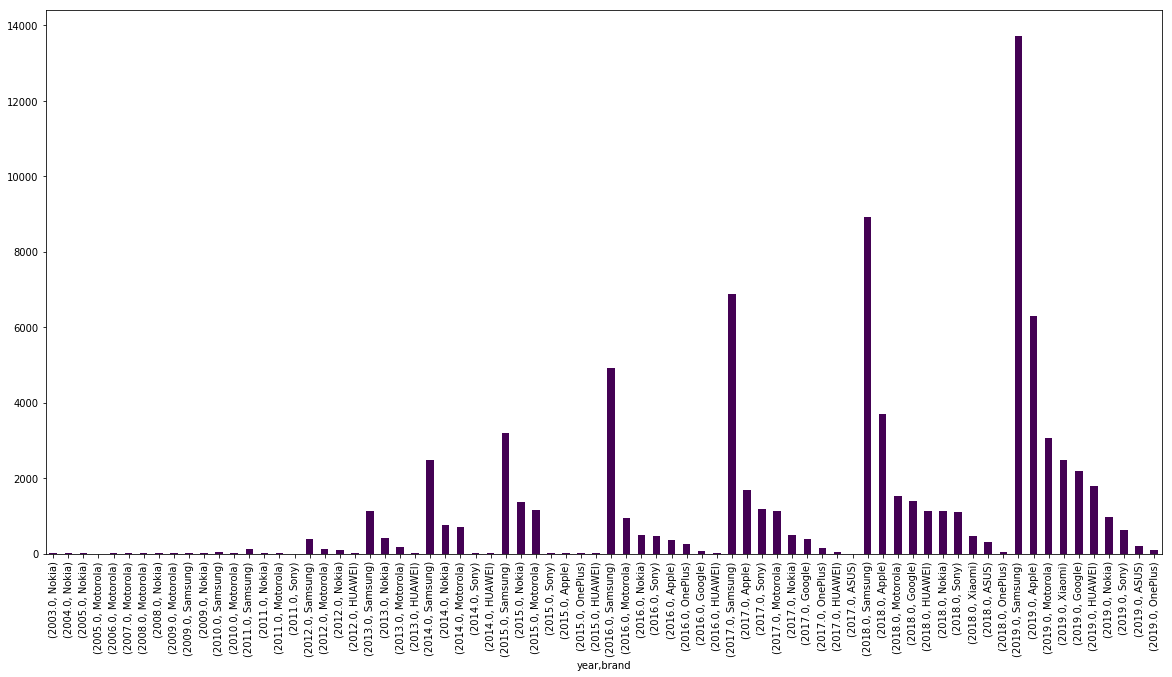

In [128]:
# How many references of smartphones were present on Amazon by brand by year => I will change this plot 
df.groupby(['year'])['brand'].value_counts().plot(kind='bar', figsize=(20,10), cmap='viridis')

In [129]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd

cf.go_offline()

In [130]:
df.head(1)

,asin,brand,productTitle,url,image,mean_rating,reviewUrl,totalReviews,prices,name,rating_individual,date,verified,rating_title,ratingBody,helpfulVotes,day,month,year
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14.0,NaN,Janet,3.0,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,11.0,10.0,2005.0


In [131]:
data1=df.groupby('brand', as_index=False)['totalReviews'].sum()

In [132]:
data1

,brand,totalReviews
0,ASUS,46670.0
1,Apple,4800977.0
2,Google,1786313.0
3,HUAWEI,950597.0
4,Motorola,2760380.0
5,Nokia,1945928.0
6,OnePlus,117793.0
7,Samsung,16397519.0
8,Sony,864790.0
9,Xiaomi,795132.0


In [133]:
data1.iplot(kind='bar', x='brand', xTitle='Brand', yTitle='Reviews / by brand', 
           title='total number of reviews by brand', filename='bar-direct-labels')

## Merge columns of Review Title and the Review Body into one. 
Some of the titles contain useful information with a long description of the consumers opinion or problem encountered, which cannot be neglected.

In [79]:
df.ratingBody.isnull().sum().sum()

21

In [80]:
df=df.dropna(subset=['rating_title', 'ratingBody'])

In [81]:
# cleaned 21 rows with NA values before and merge column rating title and rating body into one.
df['text'] = df[['rating_title', 'ratingBody']].apply(lambda x: ' '.join(x), axis=1)

In [82]:
df.tail(1)

,asin,brand,productTitle,url,image,mean_rating,reviewUrl,totalReviews,prices,name,rating_individual,date,verified,rating_title,ratingBody,helpfulVotes,day,month,year,text
82814,B07X51T2VK,HUAWEI,"Honor 5X Unlocked Smartphone, 16GB Dark Grey (...",https://www.amazon.com/Honor-Unlocked-Smartpho...,https://m.media-amazon.com/images/I/71qG253Lcx...,4.0,https://www.amazon.com/product-reviews/B07X51T2VK,1.0,74.99,Steve H.,4.0,2019-09-16,True,Awesome.,"What a great phone! Sleek, fast, great soundin...",1.0,16.0,9.0,2019.0,"Awesome. What a great phone! Sleek, fast, grea..."


# Exploratory analysis
Reduction to specific period from Jan-2017 till Sept 2019

*** I will take the time period since 2015 till now, as the mobile industry players and market significantly and continiously changes. The technologies are changing and proposing more features and services. ***
Roughly the launch of network technologies:
- 2G first smartphone - 1993 
- 3G - 2005 
- 4G - 2010
- 5G - 2020 

Various carriers have made announcements that 2G technology in the United States, Japan, Australia, and other countries is in the process of being shut down, or have already shut down 2G services so that carriers can reclaim those radio bands and re-purpose them for newer technologies. This process started from 2016 and will be finalized by some carriers on 2021.


> Initial dataset contained 82815 reviews.
  Dataset covering from Jan 2016 till now has 70549 rows. Only 15% of data removed.
  Dataset covering from Jan 2017 till now has 63065 rows. Only 24% of data removed.

In [83]:
df_2017=df[(df['date'].dt.year >= 2017)]

In [84]:
df_2017.describe()

,mean_rating,totalReviews,rating_individual,helpfulVotes,day,month,year
count,63038.000000,63038.000000,63038.000000,24529.000000,63038.000000,63038.000000,63038.000000
mean,3.727920,354.029839,3.719027,7.303233,15.871665,6.255639,2018.309686
std,0.431499,258.890512,1.635123,27.666357,8.746872,3.053970,0.769048
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000
25%,3.400000,129.000000,2.000000,1.000000,8.000000,4.000000,2018.000000
50%,3.700000,309.000000,5.000000,2.000000,16.000000,6.000000,2018.000000
75%,4.100000,530.000000,5.000000,4.000000,23.000000,8.000000,2019.000000
max,5.000000,984.000000,5.000000,932.000000,31.000000,12.000000,2019.000000


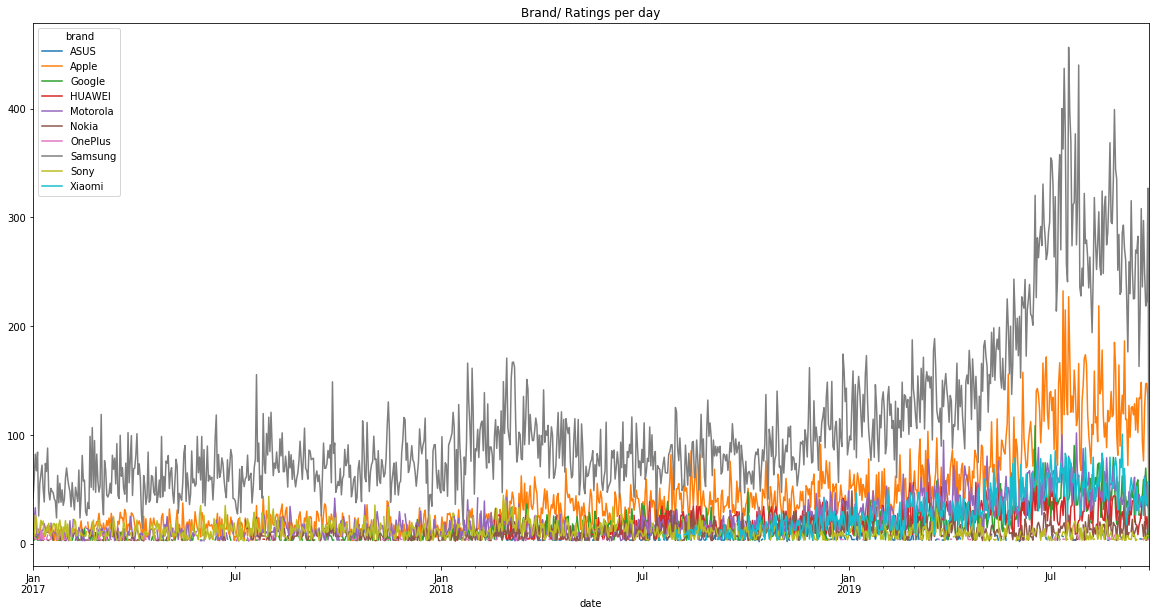

In [85]:
df_2017.groupby(['date','brand'])['mean_rating'].sum().unstack().plot(figsize=(20,10))
plt.title('Brand/ Ratings per day')
plt.show()

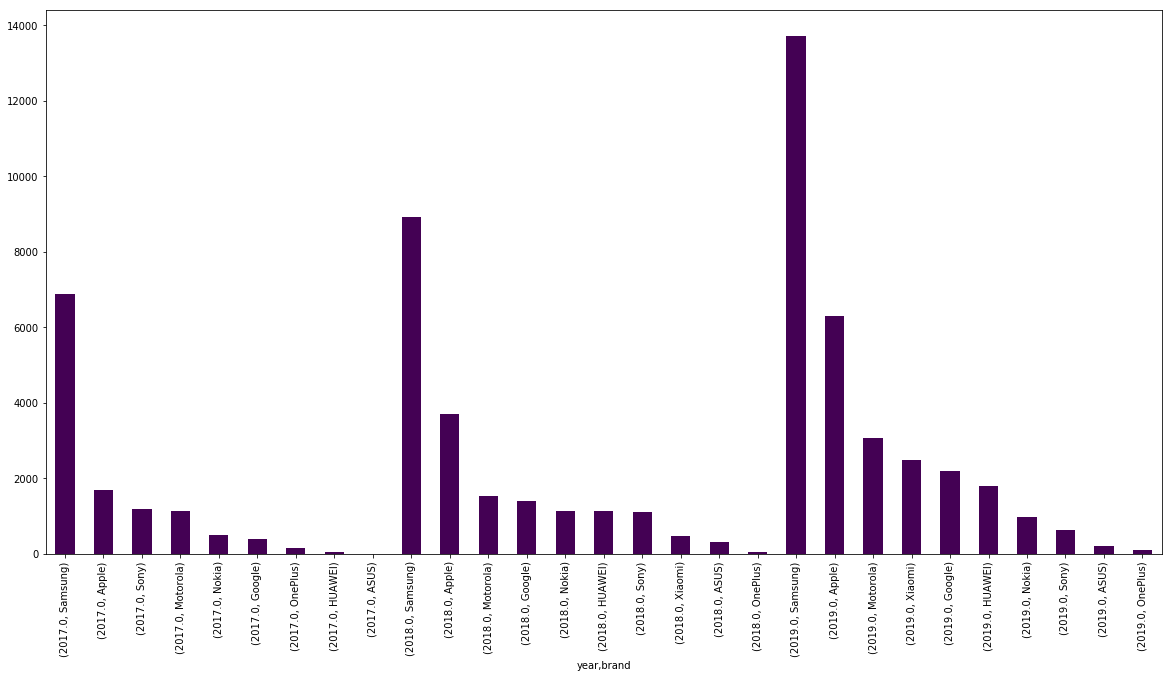

In [86]:
RefsNumber=df_2017.groupby(['year'])['brand'].value_counts().plot(kind='bar', figsize=(20,10), cmap='viridis')

- Samsung dominates since 2011 by number of reviews on Amazon. The trend confirms from 2017 till now
- Xiaomi reviews appeared mid  2018

In [87]:
grouped_by_brand=df_2017.groupby(['brand', 'asin', 'productTitle', 'prices']).agg({'mean_rating':np.mean, 'totalReviews': np.sum})
# 778 references  presented since 2016 on Amazon

In [88]:
grouped_by_brand.tail()

mean_rating  \
brand  asin       productTitle                                       prices                
Xiaomi B07R5ZYR77 Xiaomi Mi 9 128GB + 6GB RAM - 48MP Ultra High R... 413.90          4.6   
       B07SQ2JZTF Xiaomi Mi 9T Factory Unlocked Global 4G LTE Dua... 344.50          4.2   
       B07TRPH8SD Xiaomi Mi 9T (64GB, 6GB RAM) 6.39" AMOLED FHD +... 299.99          4.5   
       B07VD3JH2C Xiaomi Mi A3 64GB + 4GB RAM, Triple Camera, 4G ... 187.72          4.1   
       B07VXKDVKM Xiaomi Mi A3 128GB, 4GB RAM 6.1' 48MP AI Triple... 211.96          4.0   

                                                                             totalReviews  
brand  asin       productTitle                                       prices                
Xiaomi B07R5ZYR77 Xiaomi Mi 9 128GB + 6GB RAM - 48MP Ultra High R... 413.90         729.0  
       B07SQ2JZTF Xiaomi Mi 9T Factory Unlocked Global 4G LTE Dua... 344.50         400.0  
       B07TRPH8SD Xiaomi Mi 9T (64GB, 6GB RAM) 6.39" AMOLED FHD +... 299.99        4624.0  
       B07VD3JH2C Xiaomi Mi A3 64GB + 4GB RAM, Triple Camera, 4G ... 187.72         289.0  
       B07VXKDVKM Xiaomi Mi A3 128GB, 4GB RAM 6.1' 48MP AI Triple... 211.96          16.0

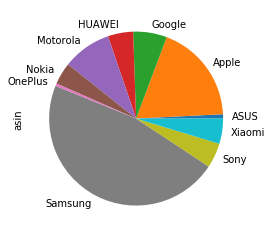

In [89]:
df_2017.groupby('brand').count()['asin'].plot(kind="pie")

In [90]:
# Rating calculation by brand
df_2017.groupby('brand')['mean_rating'].mean().sort_values(ascending=False)

brand
Xiaomi      4.311669
HUAWEI      4.308857
OnePlus     3.959683
Motorola    3.746050
ASUS        3.732937
Google      3.719474
Samsung     3.691290
Sony        3.647801
Apple       3.611161
Nokia       3.375763
Name: mean_rating, dtype: float64

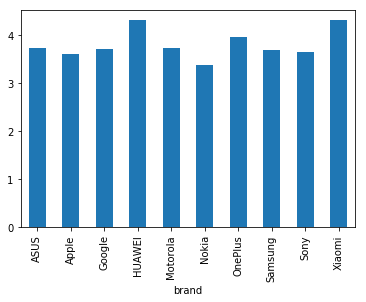

In [91]:
# Ratings plot by brand
df_2017.groupby('brand')['mean_rating'].mean().plot(kind='bar')

**Ratings over the last 4 years are at similar range on Amazon - all being >3.0 score, while the weight of references sold on Amazon is not balanced, Samsung taking almost 50% of presence on Amazon.**

# Reduced Dataset from 2017 and 4 columns only preparation for testing aims

In [92]:
#cols=['asin', 'text', 'productTitle','brand', 'mean_rating', 'totalReviews', 'prices', 'rating_individual', 'year', 'month']
cols=['asin', 'text','brand', 'mean_rating']
amazon2017=pd.DataFrame(data=df_2017, columns=cols)
amazon2017.shape

(63038, 4)

In [93]:
amazon2017.to_pickle('../amazon2017.pkl') # intermediate data preparation for next treatment and steps as pkl object

In [94]:
amazon2017.to_csv('../amazon2017.csv')  # intermediate data preparation for next treatment and steps as csv

In [95]:
# End of part 1. Next step is the text pre-processing